In [1]:
# **I. Explarotory data analysis**

## General exploration





### Get the data

> Load the data we will for training and testing our model

In [1]:
import numpy as np
import pandas as pd

# Load training and test data using pandas
train_data = pd.read_csv('/kaggle/input/tmdb-box-office-prediction/train.csv')
test_data = pd.read_csv('/kaggle/input/tmdb-box-office-prediction/test.csv')

> Seems we do not have much data to go around, so we will need to engineer some

In [2]:
train_data.shape, test_data.shape

((3000, 23), (4398, 22))

> Lets take a quick look at the data 🧐

In [3]:
train_data.dtypes

id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
Keywords                  object
cast                      object
crew                      object
revenue                    int64
dtype: object

In [4]:
train_data.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [6]:
train_data.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


### Discover and Visualize Data

> In order to get some insight from data we need to take a look at them

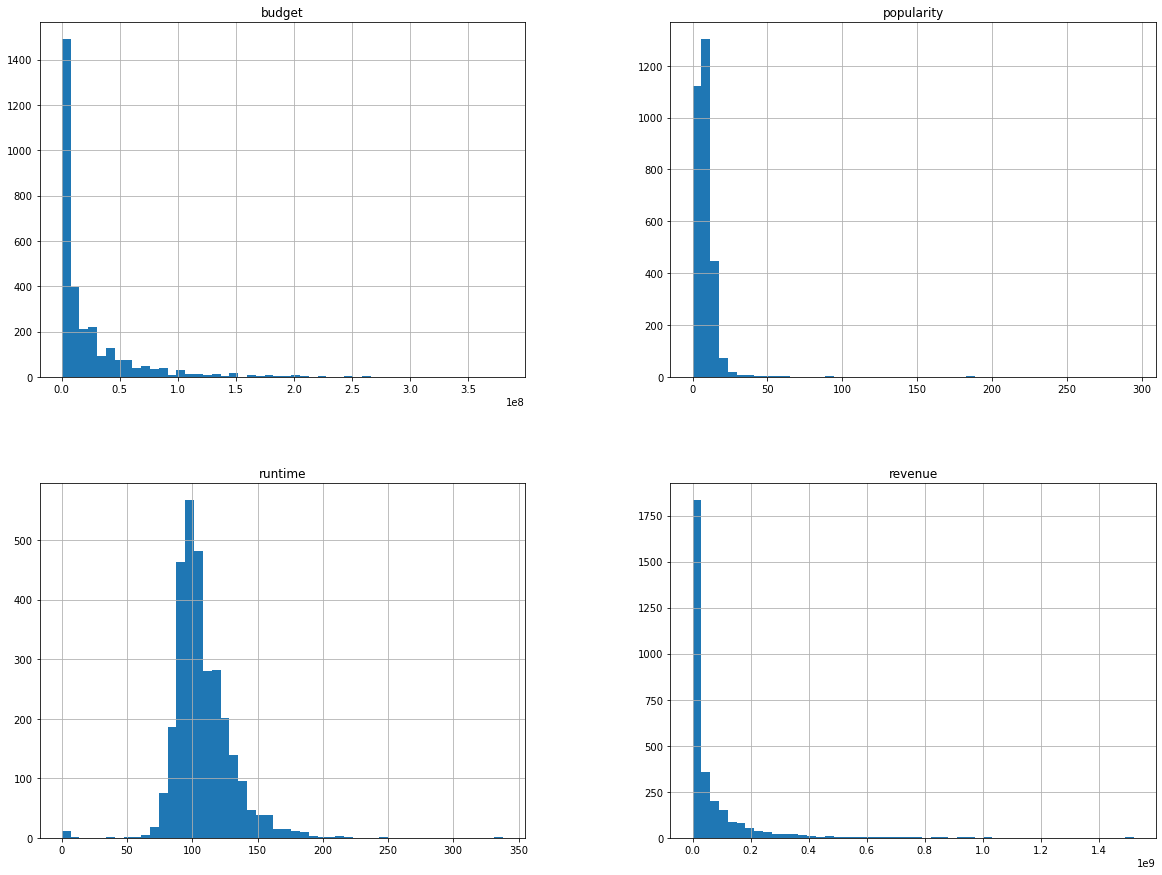

In [7]:
%matplotlib inline 

import matplotlib.pyplot as plt

train_data.drop('id', axis=1).hist(bins=50, figsize=(20, 15))
plt.show()

<AxesSubplot:xlabel='budget', ylabel='popularity'>

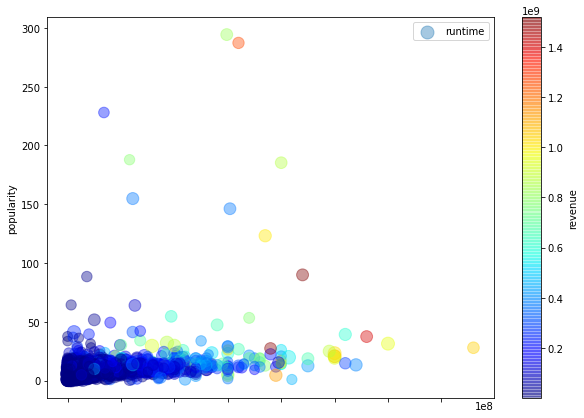

In [8]:
train_data.drop('id', axis=1).plot(kind='scatter', x='budget', y='popularity', alpha=0.4,
                                  s=train_data['runtime'], label='runtime', figsize=(10, 7),
                                  c='revenue', cmap=plt.get_cmap('jet'), colorbar=True)

> Popularity and budget seem to important in correlation to the revenue

In [9]:
corr_matrix = train_data.corr()
corr_matrix['revenue'].sort_values(ascending=False)

revenue       1.000000
budget        0.752965
popularity    0.461460
runtime       0.216380
id            0.000610
Name: revenue, dtype: float64

### Feature Engineering

> The numerical data available in the dataset are very limited, but using feature engineering it is possible to create new data for the ML-model to train with

In [10]:
from ast import literal_eval
from sklearn.base import BaseEstimator, TransformerMixin

class TextToDictTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, features):
        self.features = features
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        for column in self.features:
            X[column] = X[column].apply(lambda x: {} if pd.isna(x) else literal_eval(x))
        return X

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin

class BooleanTransformer(BaseEstimator, TransformerMixin):
    '''
    Transform binary values to boolean
    '''
    def __init__(self, features):
        self.features = features
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        try:
            for column in self.features:
                X[column] = X[column].apply(lambda x: 1 if x != {} and pd.isna(x) == False else 0)
        except Exception as ex:
            print("Boolean transformer error:", ex)
        return X

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin

class OneHotTransformer(BaseEstimator, TransformerMixin):
    '''
    One hot objects using the name attribute of the dict
    '''
    def __init__(self, features, top_values):
        self.features = features
        self.top_values = top_values
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        try:
            i = 0
            for feature in self.features:
                for name in self.top_values[i]:
                    X[f'{feature}_{name}'] = X[feature].apply(lambda x: 1 if name in str(x) else 0)
                i += 1
                    
            X = X.drop(self.features, axis=1)
        except Exception as ex:
            print("One hot tansformer error:", ex)
        return X

In [13]:
from collections import Counter
from sklearn.base import BaseEstimator, TransformerMixin
    

class CastTransformer(BaseEstimator, TransformerMixin):
    '''
    Create columns for most common names and characters and also the size of the whole cast
    as well as the size divided to different genders
    '''
    def __init__(self, top_cast_names, top_cast_chars):
        self.top_cast_names = top_cast_names
        self.top_cast_chars = top_cast_chars
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        try:
            X['cast_len'] = X['cast'].apply(lambda x: len(x) if x != {} else 0)
            
            for name in self.top_cast_names:
                X[f'cast_name_{name}'] = X['cast'].apply(lambda x: 1 if name in str(x) else 0)
                
            for name in self.top_cast_chars:
                X[f'cast_char_{name}'] = X['cast'].apply(lambda x: 1 if name in str(x) else 0)
            
            X['cast_gender_undef'] = X['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
            X['cast_gender_male'] = X['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
            X['cast_gender_female'] = X['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
            
            X = X.drop('cast', axis=1)
        except Exception as ex:
            print("Cast transformer error:", ex)
        return X

In [14]:
from collections import Counter
from sklearn.base import BaseEstimator, TransformerMixin


class CrewTransformer(BaseEstimator, TransformerMixin):
    '''
    Create columns for most common names, jobs and departments and also the size of the whole cast
    as well as the size divided to different genders
    '''
    def __init__(self, top_crew_names, top_crew_jobs, top_crew_departments):
        self.top_crew_names = top_crew_names
        self.top_crew_jobs = top_crew_jobs
        self.top_crew_departments = top_crew_departments
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        try:
            X['crew_len'] = X['crew'].apply(lambda x: len(x) if x != {} else 0)
            
            for name in self.top_crew_names:
                X[f'crew_name_{name}'] = X['crew'].apply(lambda x: 1 if name in str(x) else 0)
                
            for name in self.top_crew_jobs:
                X[f'crew_job_{name}'] = X['crew'].apply(lambda x: 1 if name in str(x) else 0)
                
            for name in self.top_crew_departments:
                X[f'crew_department_{name}'] = X['crew'].apply(lambda x: 1 if name in str(x) else 0)
            
            X['crew_gender_undef'] = X['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
            X['crew_gender_male'] = X['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
            X['crew_gender_female'] = X['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
            
            X = X.drop('crew', axis=1)
        except Exception as ex:
            print("Crew transformer error:", ex)
        return X

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin

class DateTransformer(BaseEstimator, TransformerMixin):        
    '''
    Breaks date to 3 different values for year, month and day
    '''
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        try:            
            X['year'] = pd.Series(pd.DatetimeIndex(X['release_date']).year)
            X['month'] = pd.Series(pd.DatetimeIndex(X['release_date']).month)
            X['day'] = pd.Series(pd.DatetimeIndex(X['release_date']).day)
            X = X.drop('release_date', axis=1)
        except Exception as ex:
            print("Date transformer pipeline error:", ex)
        return X

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin

class FixRevenueTransformer(BaseEstimator, TransformerMixin):
    '''
    Fix some values that are problematic
    '''
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        try:
            X.loc[X['id'] == 16,'revenue'] = 192864          # Skinning
            X.loc[X['id'] == 90,'budget'] = 30000000         # Sommersby          
            X.loc[X['id'] == 118,'budget'] = 60000000        # Wild Hogs
            X.loc[X['id'] == 149,'budget'] = 18000000        # Beethoven
            X.loc[X['id'] == 313,'revenue'] = 12000000       # The Cookout 
            X.loc[X['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
            X.loc[X['id'] == 464,'budget'] = 20000000        # Parenthood
            X.loc[X['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
            X.loc[X['id'] == 513,'budget'] = 930000          # From Prada to Nada
            X.loc[X['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
            X.loc[X['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
            X.loc[X['id'] == 850,'budget'] = 90000000        # Modern Times
            X.loc[X['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
            X.loc[X['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
            X.loc[X['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
            X.loc[X['id'] == 1542,'budget'] = 1              # All at Once
            X.loc[X['id'] == 1570,'budget'] = 15800000       # Crocodile Dundee II
            X.loc[X['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
            X.loc[X['id'] == 1714,'budget'] = 46000000       # The Recruit
            X.loc[X['id'] == 1721,'budget'] = 17500000       # Cocoon
            X.loc[X['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
            X.loc[X['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
            X.loc[X['id'] == 2491,'revenue'] = 6800000       # Never Talk to Strangers
            X.loc[X['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
            X.loc[X['id'] == 2612,'budget'] = 15000000       # Field of Dreams
            X.loc[X['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
            X.loc[X['id'] == 2801,'budget'] = 10000000       # Fracture
            X.loc[X['id'] == 3889,'budget'] = 15000000       # Colossal
            X.loc[X['id'] == 6733,'budget'] = 5000000        # The Big Sick
            X.loc[X['id'] == 3197,'budget'] = 8000000        # High-Rise
            X.loc[X['id'] == 6683,'budget'] = 50000000       # The Pink Panther 2
            X.loc[X['id'] == 5704,'budget'] = 4300000        # French Connection II
            X.loc[X['id'] == 6109,'budget'] = 281756         # Dogtooth
            X.loc[X['id'] == 7242,'budget'] = 10000000       # Addams Family Values
            X.loc[X['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
            X.loc[X['id'] == 5591,'budget'] = 4000000        # The Orphanage
            X.loc[X['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee

            power_six = X.id[X.budget > 1000][X.revenue < 100]

            for k in power_six :
                X.loc[X['id'] == k,'revenue'] =  X.loc[X['id'] == k,'revenue'] * 1000000
                
            return X
        
        except Exception as ex:
            print("Fix revenue transformer error:", ex)

In [17]:
from collections import Counter
from sklearn.base import BaseEstimator, TransformerMixin

class DropFeaturesTransformer(BaseEstimator, TransformerMixin):
    '''
    Drop unwanted features
    '''
    def __init__(self, features):
        self.features = features
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        try:
            return X.drop(self.features, axis=1)
        except Exception as ex:
            print("Drop features transformer error:", ex)

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin

class TrainTestTransformer(BaseEstimator, TransformerMixin):        
    def __init__(self, impute=False, normalize=False):
        self.impute = impute
        self.normalize = normalize
        
    def fit(self, X, y=None):
        
        if self.impute:
            X = X.fillna(X.median())
    
        self.X = X.drop('revenue', axis=1)    
        self.y = X['revenue']
        
        if self.normalize:
            self.X = MinMaxScaler().fit_transform(self.X)
        
        return self
    
    def transform(self, X):
        return train_test_split(self.X, self.y, test_size=0.10)

In [19]:
def top_values(X, column, attribute):
    '''
    Find the most common values for a column in the dataset
    '''
    try:
        values = X[column].apply(lambda x: [i[attribute] for i in x] if x != {} else []).values
        top_values = Counter([j for i in values for j in i]).most_common(30)
        top_values = [i[0] for i in top_values]
        return top_values
    except Exception as ex:
        print(ex)

### Prepare Data for Machine Learning algorithms

> Creating pipelines will allow us to handle data easily and make model testing and selection easier

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


text_to_dict = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

boolean_features = ['homepage', 'belongs_to_collection']

one_hot_objects = ['genres', 'production_countries', 'spoken_languages', 'production_companies']

drop_features = ['id',
                'original_language',
                'Keywords',
                'imdb_id',
                'status',
                'poster_path', 
                'original_title',
                'overview',
                'tagline',
                'title'
                ]


engineered_data = TextToDictTransformer(text_to_dict).transform(train_data.copy())

one_hot_top_values = [top_values(engineered_data, i, 'name')  for i in one_hot_objects]

feature_engineering_pipeline = Pipeline([
    ('boolean_transformer', BooleanTransformer(boolean_features)), 
    ('one_hot_transformer', OneHotTransformer(one_hot_objects, one_hot_top_values)),
    ('date_transformer', DateTransformer()),
    ('cast_transformer', CastTransformer(top_values(engineered_data, 'cast', 'name'),
                                         top_values(engineered_data, 'cast', 'character'))),
    ('crew_transformer', CrewTransformer(top_values(engineered_data, 'crew', 'name'),
                                         top_values(engineered_data, 'crew', 'job'),
                                         top_values(engineered_data, 'crew', 'department'))),
    ('fix_revenue_transformer', FixRevenueTransformer()),
    ('drop_features_transformers', DropFeaturesTransformer(drop_features)),
])

engineered_data = feature_engineering_pipeline.fit_transform(engineered_data)
X_train, X_valid, y_train, y_valid = TrainTestTransformer(impute=True, normalize=False).fit_transform(engineered_data)

In [21]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_valid.shape)
print('y_train', y_valid.shape)

X_train (2700, 258)
y_train (2700,)
X_test (300, 258)
y_train (300,)


### Select and Train a Model

> Now that the pipeline is ready and the data are prepared, it is time to train our regression models and select the best on predicting movie revenues

**Linear regression model**

In [22]:
sample_data = X_valid[:]
sample_labels = np.log1p(y_valid[:])


num_models = 5
lin_reg_models = []
tree_reg_models = []
forest_reg_models = []

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

for i in range(num_models):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, np.log1p(y_train))

    preds = lin_reg.predict(sample_data)
    lin_mse = mean_squared_error(sample_labels, preds)
    lin_rmse = np.sqrt(lin_mse)
    
    lin_reg_models.append((lin_reg, lin_rmse))

**Decision Tree model**

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

for i in range(num_models):
    tree_reg = DecisionTreeRegressor()
    tree_reg.fit(X_train, np.log1p(y_train))
    
    preds = tree_reg.predict(sample_data)
    tree_mse = mean_squared_error(sample_labels, preds)
    tree_rmse = np.sqrt(tree_mse)
    
    tree_reg_models.append((tree_reg, tree_rmse))

**Random Forest Regressor**

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

for i in range(num_models):
    forest_reg = RandomForestRegressor(n_estimators=100)
    forest_reg.fit(X_train, np.log1p(y_train))

    preds = forest_reg.predict(sample_data)
    forest_mse = mean_squared_error(sample_labels, preds)
    forest_rmse = np.sqrt(forest_mse)
    
    forest_reg_models.append((forest_reg, forest_rmse))

In [26]:
res = pd.DataFrame({'Linear': [i[1] for i in lin_reg_models], 'Tree': [i[1] for i in tree_reg_models], 'Forest': [i[1] for i in forest_reg_models]})
res

,Linear,Tree,Forest
0,2.186001,2.688083,1.751993
1,2.186001,2.636993,1.782048
2,2.186001,2.591556,1.792629
3,2.186001,2.541546,1.753263
4,2.186001,2.558452,1.767612


### The best model is "Random Forest"

> The best model is produced using random forest, now lets use grid search to look check different hyperparameters so we can get even better results

In [27]:
import seaborn as sns

def plot_feature_importance(feature_columns, importance_values):
    feature_imp = [col for col in zip(feature_columns, importance_values)]
    feature_imp.sort(key=lambda x:x[1], reverse=True)

    imp = pd.DataFrame(feature_imp[0:20], columns=['feature', 'importance'])
    plt.figure(figsize=(10, 8))
    sns.barplot(y='feature', x='importance', data=imp)
    plt.title('20 Most Important Features', fontsize=16)
    plt.ylabel("Feature", fontsize=16)
    plt.xlabel("")
    plt.show()
    return imp

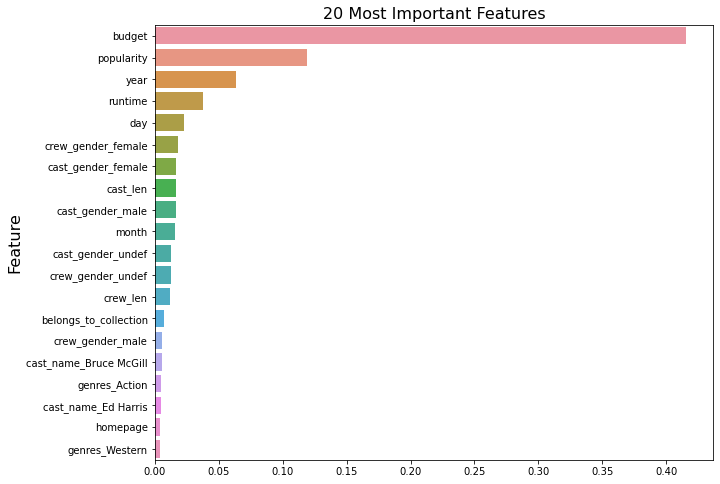

In [28]:
# Get the best model
best_forest_model, best_forest_model_rmse = sorted(forest_reg_models, key=lambda x: x[1])[0]
model_importances = plot_feature_importance(X_train.columns, best_forest_model.feature_importances_)

**Grid Search**

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'bootstrap': [False], 'n_estimators': [200, 250, 300], 'max_features': [60, 80, 100]},
    {'oob_score': [True, False], 'n_estimators': [150, 180, 200], 'max_features': [40, 50, 60]},
]

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, np.log1p(y_train))

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [False], 'max_features': [60, 80, 100],
                          'n_estimators': [200, 250, 300]},
                         {'max_features': [40, 50, 60],
                          'n_estimators': [150, 180, 200],
                          'oob_score': [True, False]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [30]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=100, n_estimators=200)

In [31]:
grid_search_model = grid_search.best_estimator_

preds = grid_search_model.predict(sample_data)
grid_mse = mean_squared_error(sample_labels, preds)
grid_rmse = np.sqrt(forest_mse)
grid_rmse

1.7676117191851355

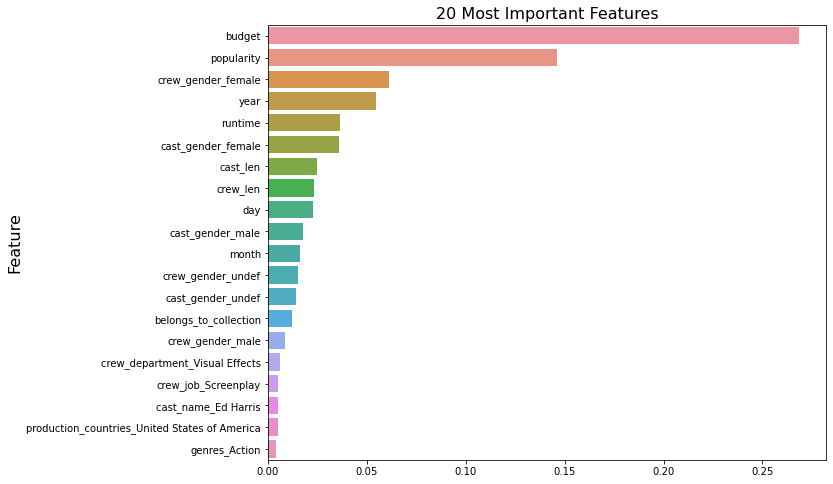

In [32]:
importances = plot_feature_importance(X_train.columns, grid_search_model.feature_importances_)

> Compare our best forest model with the results of grid search, and use the best model

In [33]:
print('Random Forest model selected' if best_forest_model_rmse < grid_rmse else 'Grid search model selected')
model = best_forest_model if best_forest_model_rmse < grid_rmse else grid_search_model

Random Forest model selected


*Note: The rmse is lower because we re-trained on the whole training set and that means we overfit the training data, which is not good. But this new training will come handy when making predictions on the test set*

In [34]:
X, y = X_train.append(X_valid), y_train.append(y_valid)

model.fit(X, np.log1p(y))

preds = model.predict(sample_data)
model_mse = mean_squared_error(sample_labels, preds)
model_rmse = np.sqrt(model_mse)
model_rmse

0.6815209967385003